# **AI를 이용한 신약 개발 실습 2**
- 2022년 10월 14일 의료정보학교실 이화민

In [1]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 4.3 MB/s 
     |████████████████████████████████| 36.8 MB 33 kB/s 


In [3]:
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

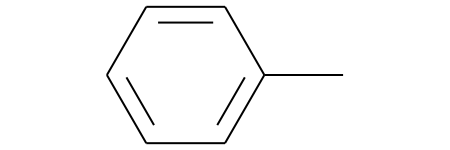

In [5]:
m = Chem.MolFromSmiles('Cc1ccccc1')
m

In [6]:
Chem.MolToMolFile(m, "data.mol")

In [7]:
Chem.MolToPDBFile(m, "data.pdb")

In [8]:
# mol-type 변수가 가지고 있는 함수와 속성을 확인 
dir(m)

['AddConformer',
 'ClearComputedProps',
 'ClearProp',
 'Compute2DCoords',
 'ComputeGasteigerCharges',
 'Debug',
 'GetAromaticAtoms',
 'GetAtomWithIdx',
 'GetAtoms',
 'GetAtomsMatchingQuery',
 'GetBondBetweenAtoms',
 'GetBondWithIdx',
 'GetBonds',
 'GetBoolProp',
 'GetConformer',
 'GetConformers',
 'GetDoubleProp',
 'GetIntProp',
 'GetNumAtoms',
 'GetNumBonds',
 'GetNumConformers',
 'GetNumHeavyAtoms',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetRingInfo',
 'GetStereoGroups',
 'GetSubstructMatch',
 'GetSubstructMatches',
 'GetUnsignedProp',
 'HasProp',
 'HasSubstructMatch',
 'NeedsUpdatePropertyCache',
 'RemoveAllConformers',
 'RemoveConformer',
 'SetBoolProp',
 'SetDoubleProp',
 'SetIntProp',
 'SetProp',
 'SetUnsignedProp',
 'ToBinary',
 'UpdatePropertyCache',
 '__DebugMol',
 '__GetSubstructMatch',
 '__GetSubstructMatches',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',


In [9]:
m.SetProp("_Name", "My_mol")

In [10]:
Chem.MolToMolFile(m, "data.mol")

# 수소 분자 붙이기 : Chem.AddHs
- 수소 결합은 분자 내에서 일어나는 원자간의 화학결합이 아니라 분자 사이에서 일어나는 인력에 의한 결합
- 주의 : AddHs를 사용하면 새로운 분자가 만들어짐

In [17]:
print(Chem.MolToMolBlock(m))

My_mol
     RDKit          2D

  7  7  0  0  0  0  0  0  0  0999 V2000
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  2  1  0
M  END



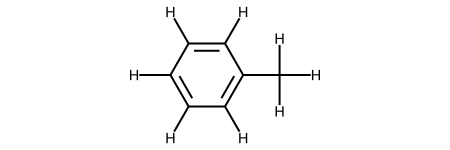

In [15]:
m2 = Chem.AddHs(m)
m2

In [16]:
print(Chem.MolToMolBlock(m2))

My_mol
     RDKit          2D

 15 15  0  0  0  0  0  0  0  0999 V2000
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    2.598

# 분자의 3차원 구조 만들기
- SMILES는 평면구조로 표현됨
- 실제 분자는 3차원 crystal 구조임
- 3차원 구조를 얻기위해서는 양자 계산과 전역 최적화 계산이 필요
- AllChem.EmbedMolecule() 함수를 사용

In [20]:
# 리턴값 0은 성공했다는 의미임 
AllChem.EmbedMolecule(m2)

0

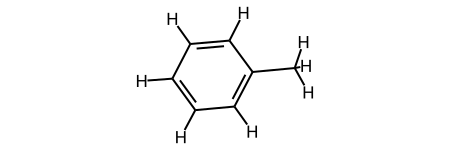

In [21]:
m2

In [22]:
print(Chem.MolToMolBlock(m2))

My_mol
     RDKit          3D

 15 15  0  0  0  0  0  0  0  0999 V2000
    2.2092    0.1897   -0.0832 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7295    0.0520   -0.0362 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0889   -1.1634   -0.1601 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2841   -1.2886   -0.1162 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0914   -0.1831    0.0568 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4601    1.0358    0.1815 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0847    1.1549    0.1367 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5204    1.1030    0.5021 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.6882   -0.6673    0.4742 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.6093    0.2665   -1.0947 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.7181   -2.0450   -0.2974 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7937   -2.2384   -0.2126 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1709   -0.2637    0.0935 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0908    1.918

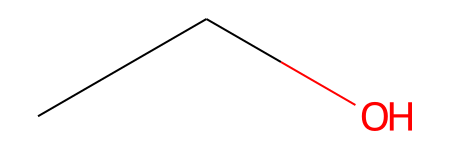

In [26]:
# 에탄올
m3 = Chem.MolFromSmiles('OCC')
m3

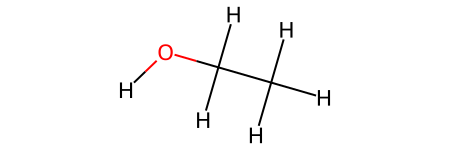

In [27]:
m4 = Chem.AddHs(m3)
m4

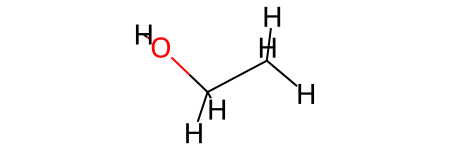

In [29]:
# 3차원 구조로 변화
AllChem.EmbedMolecule(m4)
m4

In [30]:
print(Chem.MolToMolBlock(m4))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
   -1.3912    0.4953    0.3204 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3981   -0.4552    0.2238 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8626    0.2122   -0.2408 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7557    0.7685   -0.5486 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1922   -0.8287    1.2666 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6874   -1.3305   -0.3754 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.8809    0.4881   -1.2906 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.9798    1.1458    0.3518 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.7012   -0.4954   -0.0417 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  1  4  1  0
  2  5  1  0
  2  6  1  0
  3  7  1  0
  3  8  1  0
  3  9  1  0
M  END



# 두 분자의 유사도 확인하기
- Chem.RDKFingerprint() 함수로 분자 특성 비트 정보 생성
- Morgan Fingerprint, ECFP로 각 중심 원자에서 반지름만큼 떨어진 원자까지 고려하여 분자 특성 비트 정보 생성
- Tanimoto Similarity를 계산하여 유사도 확인
- Tanimoto similarity = (교집합의 개수)/(합집합의 개수)

In [32]:
fp_m = Chem.RDKFingerprint(m)
fp_m2 = Chem.RDKFingerprint(m2)
print(fp_m, fp_m2)

<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7f9afa4285d0> <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7f9afa428260>


In [34]:
DataStructs.FingerprintSimilarity(fp_m, fp_m2)

0.1167192429022082

In [33]:
fp_m3 = Chem.RDKFingerprint(m3)
fp_m4 = Chem.RDKFingerprint(m4)

In [36]:
DataStructs.FingerprintSimilarity(fp_m3, fp_m4)

0.07142857142857142

In [38]:
DataStructs.FingerprintSimilarity(fp_m, fp_m4)

0.0

In [49]:
# 비트 벡터 특성 정보 생성
mfp_m = AllChem.GetMorganFingerprintAsBitVect(m, 2)
mfp_m

In [51]:
len(mfp_m)  # 2048비트로 구성됨

2048

In [42]:
mfp_m2 = AllChem.GetMorganFingerprintAsBitVect(m2, 2)
mfp_m2

In [44]:
DataStructs.FingerprintSimilarity(mfp_m, mfp_m2)

0.19047619047619047